# **Targeted Literature Reviews using webscraping**
Edited from a code made by: Paula-Martin Gonzalez ([Targeted Literature Reviews via webscraping](https://github.com/paulamartingonzalez/Targeted_Literature_Reviews_via_webscraping))

# 0. Install and import packages

# Libraries

In [1]:
!pip install fake-useragent
!pip install beautifulsoup4
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium
!pip install bs4
!pip install biopython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13502 sha256=d22907c9d2d632e63696e456a0a016c3dfdea063e16267e84ae79ae3bb7bc7ba
  Stored in directory: /root/.cache/pip/wheels/ed/f7/62/50ab6c9a0b5567267ab76a9daa9d06315704209b2c5d032031
Successfully built fake-useragent
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 http:/

In [2]:
import openpyxl
import requests
from fake_useragent import UserAgent
from bs4 import BeautifulSoup
import pandas as pd
from selenium import webdriver
from selenium import webdriver
import re
import requests
from lxml import html
from lxml import etree
import urllib
import re   
import unicodedata
import time
from Bio import Entrez
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.12) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


# Set GoogleDrive workspace

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Get excel with abstracts
Add your personal key and email here to be able to access the PubMed database

Instructions to get your personal key can be found here: https://ncbiinsights.ncbi.nlm.nih.gov/2017/11/02/new-api-keys-for-the-e-utilities/

The api key is optional, but you can get more articles without error

In [6]:
Entrez.email = 'gualapuro.moises@gmail.com'
Entrez.api_key = "24f60afcc52a1cc87c49ca89c14542dc6809"

Some helper functions...

In [7]:
def search(query,mymax):
    handle = Entrez.esearch(db='pubmed', sort='relevance', retmax=str(mymax),
                            retmode='xml', term=query)
    results = Entrez.read(handle)
    return results

def fetch_details(id_list):
    ids = ','.join(id_list)
    handle = Entrez.efetch(db='pubmed', retmode='xml', id=ids)
    results = Entrez.read(handle)
    return results

def fetch_details_2(id):
    handle = Entrez.efetch(db='pubmed', retmode='xml', id=id)
    results = Entrez.read(handle)
    return results

In [19]:
def papers_df(searchwords): 
  titles=[]
  aims=[]
  mms=[]
  ress=[]
  concs=[] 
  abs=[]
  keyw=[]
  DOI=[]
  pmids=[]
  refs=[]
  datepub=[]
  authors=[]
  mymax=10000000
  myquery=searchwords
  results = search(myquery,mymax)
  id_list = results['IdList'] # list of PMIDs
  chunk_size = 50000 # whatever you like   
  for chunk_i in range(0, len(id_list), chunk_size):
      chunk = id_list[chunk_i:chunk_i + chunk_size]
      papers = fetch_details(chunk)
      for i, paper in enumerate(papers['PubmedArticle']):
        try:
            data = paper.get('PubmedData')
            data2 = paper.get('MedlineCitation')
            article = data2.get('Article')
            
            title = article.get('ArticleTitle')
            abstr = article.get('Abstract').get('AbstractText')
            keywrd = data2.get('KeywordList')
            keywrd = ";".join(keywrd[0])
            doi = data.get('ArticleIdList')
            pimd = pmids.append(data2.get('PMID'))
            ref = data.get('ReferenceList')
            refs.append(ref)
            dateart = article.get('Journal').get('JournalIssue').get('PubDate')
            authores = article.get('AuthorList')
            try:
              titles.append(title)
              abs.append(". ".join(abstr))
              keyw.append(keywrd)
              DOI.append("; ".join(doi))
              datepub.append("/".join(dateart.values()))
              authors.append(authores)
            except:
              abs.append('')            
              keyw.append('')
              DOI.append('')
              datepub('')
        except:
            pass
  print(len(titles), len(abs), len(keyw), len(DOI), len(datepub))
  data = {'title': titles, 'datepub':datepub, 'abstract':abs, 'keyword':keyw, 'doi':DOI}
  df2 = pd.DataFrame(data)
  return [df2, keyw, ref, datepub, authors]

In [20]:
dengue_ec = papers_df('"dengue"AND"Ecuador"')
dengue_ec[4]

48 48 48 48 48


[ListElement([DictElement({'AffiliationInfo': [{'Identifier': [], 'Affiliation': 'Viral Diseases Branch, Walter Reed Army institute of Research, Silver Spring, MD, USA. irina.maljkovicberry.ctr@mail.mil.'}], 'Identifier': [StringElement('0000-0001-8555-5352', attributes={'Source': 'ORCID'})], 'LastName': 'Maljkovic Berry', 'ForeName': 'Irina', 'Initials': 'I'}, attributes={'ValidYN': 'Y'}), DictElement({'AffiliationInfo': [{'Identifier': [], 'Affiliation': 'Viral Diseases Branch, Walter Reed Army institute of Research, Silver Spring, MD, USA.'}], 'Identifier': [], 'LastName': 'Rutvisuttinunt', 'ForeName': 'Wiriya', 'Initials': 'W'}, attributes={'ValidYN': 'Y'}), DictElement({'AffiliationInfo': [{'Identifier': [], 'Affiliation': 'Institute for Global Health and Translational Science, SUNY Upstate Medical University, Syracuse, NY, USA.'}], 'Identifier': [], 'LastName': 'Sippy', 'ForeName': 'Rachel', 'Initials': 'R'}, attributes={'ValidYN': 'Y'}), DictElement({'AffiliationInfo': [{'Identi

In [8]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

def papers_wordcloud(keywords): 
  df = keywords
  comment_words = ''
  stopwords = set(STOPWORDS)
  
  # iterate through the csv file
  for val in df:
      # typecaste each val to string
      val = str(val) 
      # split the value
      tokens = val.split()     
      # Converts each token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()     
      comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 800, height = 800,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10).generate(comment_words)
  
  # plot the WordCloud image                      
  plt.figure(figsize = (8, 8), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0) 
  plt.show()
  return [wordcloud, comment_words]


48 48 48 48 48


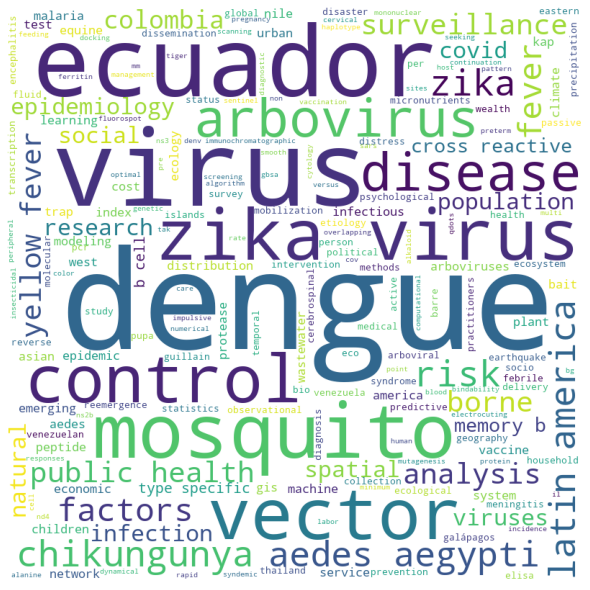

 'chikungunya;colombia;dengue;dissemination;ecuador;venezuela active surveillance;arboviral;dengue;ecuador;latin america;passive surveillance;public health intervention epidemiology;public health;statistics & research methods ecuador;thailand;dengue;epidemiology;observational study aedes aegypti;ecuador;galápagos;dengue fever;islands;social-ecological risk ecuador;climate;dengue fever;ecology;geography;risk factors;spatial analysis;temporal aedes aegypti;ecuador;kap;dengue fever;economic cost;mosquito control dengue;micronutrients ecuador;zika virus;arbovirus;chikungunya;dengue;earthquake;natural disaster;psychological distress dengue prevention;eco-bio-social;ecosystem;ecuador;pupa per person index;social mobilization elisa;ecuador;dengue fever;dengue virus;etiology;febrile;malaria;reemergence;reverse transcription pcr;surveillance;vector-borne infections;viruses dengue fever;ecuador;kap survey;medical practitioners chikungunya;dengue;ecuador;political ecology;zika disease risk;global

In [11]:
dengue_ec = papers_df('"dengue"AND"Ecuador"')
papers_wordcloud(dengue_ec[1])

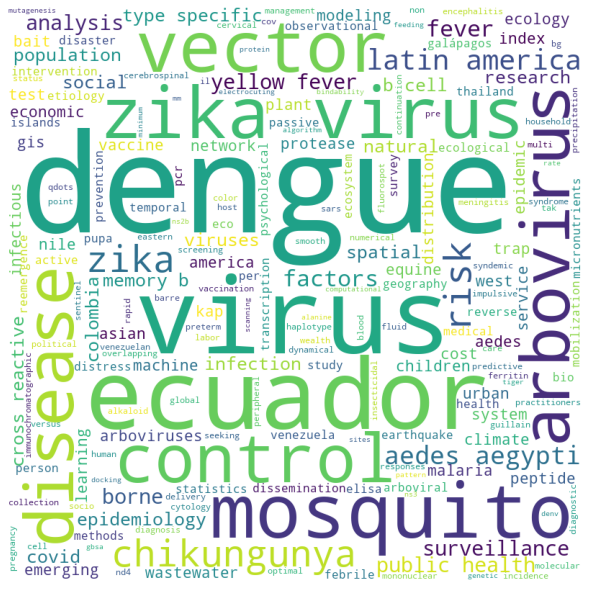

'chikungunya;colombia;dengue;dissemination;ecuador;venezuela active surveillance;arboviral;dengue;ecuador;latin america;passive surveillance;public health intervention epidemiology;public health;statistics & research methods ecuador;thailand;dengue;epidemiology;observational study aedes aegypti;ecuador;galápagos;dengue fever;islands;social-ecological risk ecuador;climate;dengue fever;ecology;geography;risk factors;spatial analysis;temporal aedes aegypti;ecuador;kap;dengue fever;economic cost;mosquito control dengue;micronutrients ecuador;zika virus;arbovirus;chikungunya;dengue;earthquake;natural disaster;psychological distress dengue prevention;eco-bio-social;ecosystem;ecuador;pupa per person index;social mobilization elisa;ecuador;dengue fever;dengue virus;etiology;febrile;malaria;reemergence;reverse transcription pcr;surveillance;vector-borne infections;viruses dengue fever;ecuador;kap survey;medical practitioners chikungunya;dengue;ecuador;political ecology;zika disease risk;global 

In [ ]:
words = papers_wordcloud(dengue_ec[1])
words[1]

113 113 113 113 113


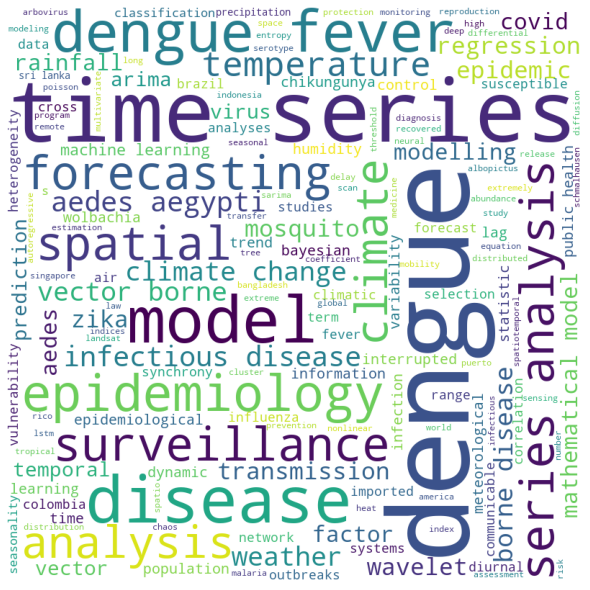

In [ ]:
dengue_ts = papers_df('"dengue"AND"time series"')
papers_wordcloud(dengue_ts[1])

56 56 56 56 56


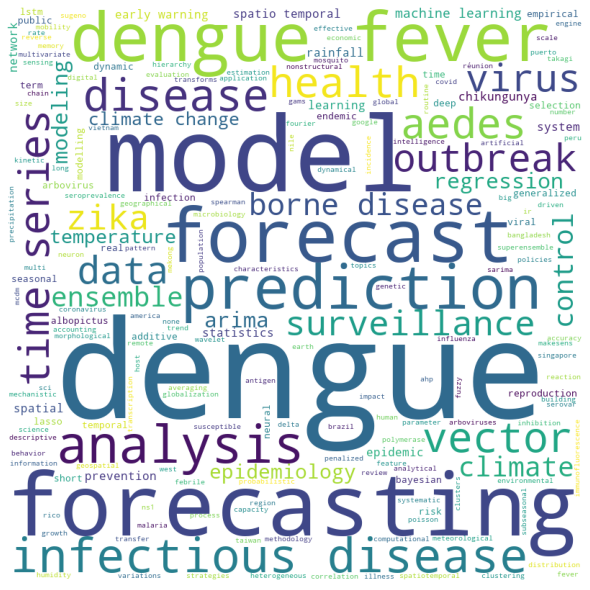

In [ ]:
dengue_forecast = papers_df('"dengue"AND"forecast"')
papers_wordcloud(dengue_forecast[1])

23 23 23 23 23


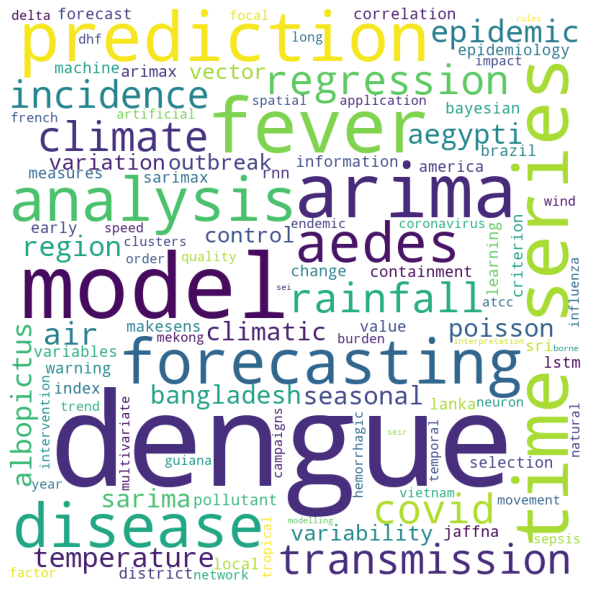

In [ ]:
dengue_arima = papers_df('"dengue"AND("ARIMA"OR"SARIMA"OR"ARIMAX")')
papers_wordcloud(dengue_arima[1])

54 54 54 54 54


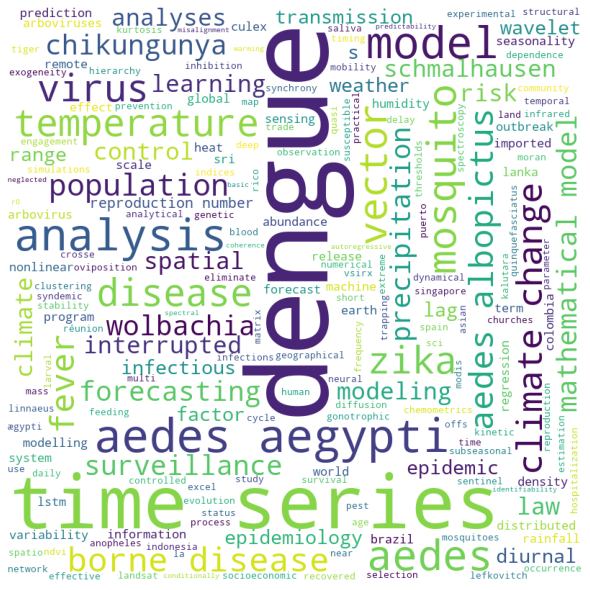

In [ ]:
aedes_ts = papers_df('"aedes"AND("time series"OR"forecast")')
papers_wordcloud(aedes_ts[1])

29 29 29 29 29


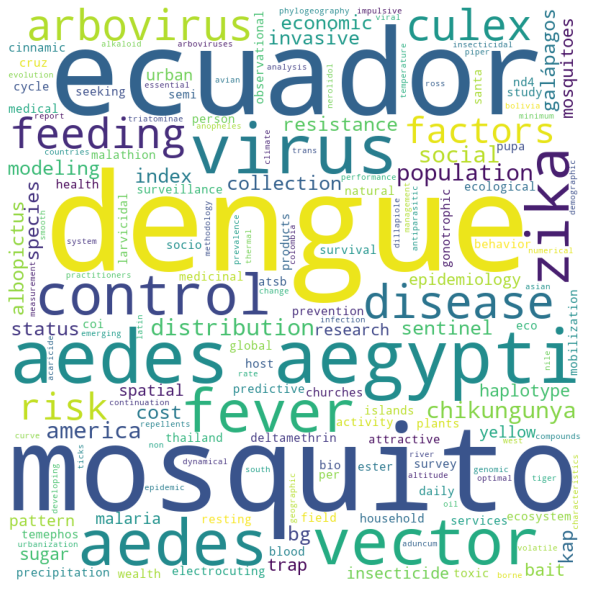

In [ ]:
aedes_ec = papers_df('"aedes"AND("Ecuador")')
papers_wordcloud(aedes_ec[1])

In [ ]:
myquery = '"dengue"AND"ARIMA"'
#myquery = ''' ("dengue"[MeSH Terms] OR "dengue"[All Fields] OR "dengue "[All Fiels] NOT("Covid")) 
#AND ("ecuador"[MeSH Terms] OR "Ecuador"[All Fields] OR "Ecuador s"[All Fields]) '''

In [ ]:
df2.to_excel('drive/MyDrive/Colab Notebooks/DengueAll.xlsx', index=False)

### Papers per year

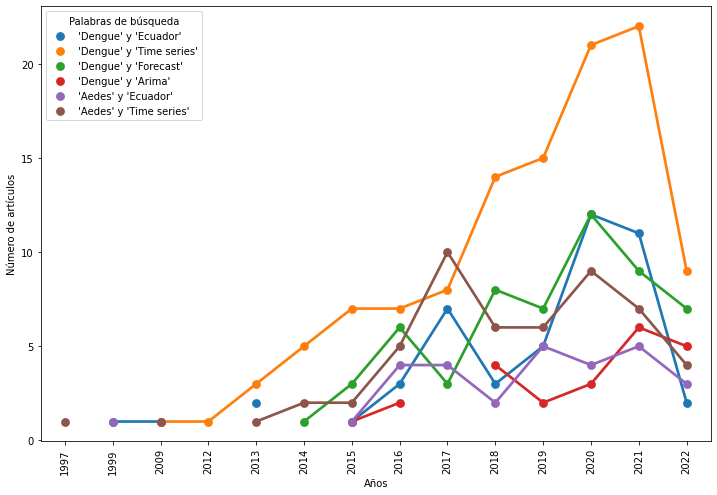

In [ ]:
import numpy as np
import pandas as pd
from functools import reduce
import seaborn as sns
import matplotlib.pylab as plt

def count_years(data, newname):
  extract_years = [x[:4] for x in data[3] if x]
  papers_per_year = pd.DataFrame(np.unique(extract_years, 
                                           return_counts=True)).T
  papers_per_year.rename(columns = {0:'Year', 1:newname}, inplace = True)
  return papers_per_year

ec_year = count_years(dengue_ec, "'Dengue' y 'Ecuador'")
ts_year = count_years(dengue_ts, "'Dengue' y 'Time series'")
frcst_year = count_years(dengue_forecast, "'Dengue' y 'Forecast'")
arima_year = count_years(dengue_arima, "'Dengue' y 'Arima'")
aedec_year = count_years(aedes_ec, "'Aedes' y 'Ecuador'")
aedts_year = count_years(aedes_ts, "'Aedes' y 'Time series'")
complete = pd.merge(ec_year, ts_year, on='Year', how='outer')
complete

data_frames = [ec_year, ts_year, frcst_year, arima_year, aedec_year, aedts_year]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Year'],
                                            how='outer'), data_frames).fillna('')
all_papers = df_merged.sort_values(by="Year", axis=0)
dfm = all_papers.melt('Year', var_name='Keywords', value_name='Counts')

dfm['Year'] = pd.to_numeric(dfm['Year'])
dfm['Counts'] = pd.to_numeric(dfm['Counts'])

# Grafico
plt.figure(figsize=(12,8))
count_plot = sns.pointplot(x="Year", y="Counts", hue='Keywords', data=dfm, legend=False)
count_plot.set( xlabel = "Años", ylabel = "Número de artículos")
plt.legend(title='Palabras de búsqueda', loc='upper left')
plt.setp(count_plot.get_xticklabels(), rotation=90)
plt.show(count_plot)

In [ ]:
import numpy as np
import pandas as pd
from functools import reduce
import seaborn as sns
import matplotlib.pylab as plt
import itertools

def topic_wordcount(keywords, newname): 
  df = keywords
  comment_words = []
  stopwords = set(STOPWORDS)
  for val in df:
      val = str(val) 
      tokens = val.split()
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()     
      comment_words.extend(tokens)
  comment_words = [x.split(";") for x in comment_words if x]
  single_words = list(itertools.chain(*comment_words))
  words_topic = pd.DataFrame(np.unique(single_words, 
                                           return_counts=True)).T
  words_topic.rename(columns = {0:'Word', 1:newname}, inplace = True)
  return words_topic
  
ec_wordcount = topic_wordcount(dengue_ec[1], "'Dengue' y 'Ecuador'")
ts_wordcount = topic_wordcount(dengue_ts[1], "'Dengue' y 'Time series'")
frcst_wordcount = topic_wordcount(dengue_forecast[1], "'Dengue' y 'Forecast'")
arima_wordcount = topic_wordcount(dengue_arima[1], "'Dengue' y 'Arima'")
aedec_wordcount = topic_wordcount(aedes_ec[1], "'Aedes' y 'Ecuador'")
aedts_wordcount = topic_wordcount(aedes_ts[1], "'Aedes' y 'Time series'")
data_frames = [ec_wordcount, ts_wordcount, frcst_wordcount, 
               arima_wordcount, aedec_wordcount, aedts_wordcount]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Word'],
                                            how='outer'), data_frames).fillna('')
all_papers = df_merged.sort_values(by="Word", axis=0)
all_papers.to_excel('drive/MyDrive/Colab Notebooks/WordCounts_Dengue.xlsx', index=False)

dfm = all_papers.melt('Word', var_name='Keywords', value_name='Counts')
dfm.to_excel('drive/MyDrive/Colab Notebooks/LongWordCounts_Dengue.xlsx', index=False)


# 2. Get the graph for the citations
Get the nodes and edges



In [ ]:
nodes = []
edges = []
new_ids=[]
for i in range(len(refs)):
  temp = refs[i]
  name=str(pmids[i])
  if temp:
    if name not in nodes:
      nodes.append(name)
    temp2 = temp[0]
    A = temp2.get('Reference')
    for j in range(len(A)):
      temp3 = A[j].get('ArticleIdList')
      try:
        name2 = str(temp3[0])
        if name2 not in nodes:
          nodes.append(name2)
          new_ids.append(name2)
        edges.append((name,name2))
      except:
        pass

In [ ]:
print(nodes[:10])
print(edges[:10])
print(new_ids[:10])

['34900929', '22113877', '28435826', '33766145', '33064770', '33441678', '31393908', '33769141', '26479830', '26203465']
[('34900929', '22113877'), ('34900929', '28435826'), ('34900929', '33766145'), ('34900929', '33064770'), ('34900929', '33441678'), ('34900929', '31393908'), ('34900929', '33769141'), ('34900929', '26479830'), ('34900929', '26203465'), ('34900929', '31936708')]
['22113877', '28435826', '33766145', '33064770', '33441678', '31393908', '33769141', '26479830', '26203465', '31936708']


In [ ]:
dfnx = pd.DataFrame(edges, columns=['node1', 'node2'])
dfnx[:3]
dfnx.to_csv('drive/MyDrive/Colab Notebooks/nx_denguets.csv', index=False)

Build the graph

In [ ]:
g = nx.Graph()
g.add_nodes_from(nodes)
for i in range(len(edges)):
  B = edges[i]
  g.add_edge(B[0], B[1])

color code the original papers in blue, the rest in red

In [ ]:
color_map = []
for node in nodes:
    if node in pmids:
        color_map.append('blue')
    else: 
        color_map.append('red')

get the graph

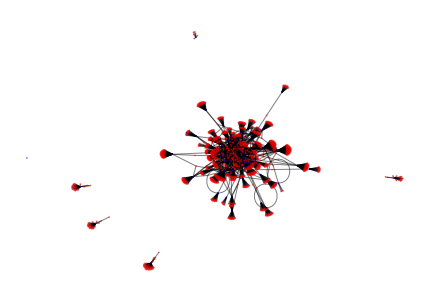

In [ ]:
nx.draw(g,node_size=0.5, node_color=color_map,alpha=0.5)
plt.savefig("drive/MyDrive/Colab Notebooks/denguets.png", dpi=300, facecolor='w', edgecolor='w')  

# WordCloud

## WordCloud from keywords

In [ ]:
# https://www.geeksforgeeks.org/generating-word-cloud-python
#!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
 # Data of keywords
df = keyw
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df:
    # typecaste each val to string
    val = str(val) 
    # split the value
    tokens = val.split()     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()     
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show()

NameError: ignored

## WordCloud from Abstracts

In [ ]:
# https://doi.org/10.1016/j.proeng.2017.01.223 

Voilá!!

now we can also get the abstracts for the references

In [ ]:
mymax=100
id_list = new_ids # list of UIDs
chunk_size = 50 # whatever you like   
for chunk_i in range(0, len(id_list), chunk_size):
    chunk = id_list[chunk_i:chunk_i + chunk_size]
 
    papers = fetch_details(chunk)
    for i, paper in enumerate(papers['PubmedArticle']):
      try:
          data = paper.get('PubmedData')
          data2 = paper.get('MedlineCitation')
          article = data2.get('Article')
          title = article.get('ArticleTitle')
          abstr = article.get('Abstract')
          abstr = abstr.get('AbstractText')
          ref = data.get('ReferenceList')
          refs.append(ref)
          pmids.append(data2.get('PMID'))
          cited_by.append(str(g.degree(str(data2.get('PMID')))))
          try:
            aim = abstr[0]
            MM = abstr[1]
            res = abstr[2]
            conc = abstr[3]
            titles.append(title)
            aims.append(aim)
            mms.append(MM)
            ress.append(res)
            concs.append(conc)
            abs.append('')
          except:
            abs.append(abstr[0])
            titles.append(title)
            aims.append('')
            mms.append('')
            ress.append('')
            concs.append('')
      except:
          pass

add them to a dataframe

In [ ]:
data = {'title': titles, 'id':pmids,'abs':abs,'aims':aims,'MM':mms,'res':ress,'concl':concs,'degree':cited_by} 
df2 = pd.DataFrame(data) 
df2

and we can save/download the document

In [ ]:
df2.to_excel('drive/MyDrive/Colab Notebooks/output.xlsx')

Some of the posts I've used as references:

https://medium.com/@kliang933/scraping-big-data-from-public-research-repositories-e-g-pubmed-arxiv-2-488666f6f29b

https://github.com/CrossRef/rest-api-doc#queries

# Pubmed article structure

In [ ]:
#@title Pubmed article structure
art_example = {'MedlineCitation': DictElement({'SpaceFlightMission': [], 'GeneralNote': [], 'OtherAbstract': [], 
                                               'KeywordList': [ListElement([StringElement('climate change', attributes={'MajorTopicYN': 'Y'}), 
                                                                            StringElement('dengue fever', attributes={'MajorTopicYN': 'Y'}), 
                                                                            StringElement('machine learning', attributes={'MajorTopicYN': 'Y'}), 
                                                                            StringElement('prediction', attributes={'MajorTopicYN': 'Y'}), 
                                                                            StringElement('regression model', attributes={'MajorTopicYN': 'Y'}), 
                                                                            StringElement('time series forecasting', attributes={'MajorTopicYN': 'Y'})], attributes={'Owner': 'NOTNLM'})], 
                                               'OtherID': [], 'CitationSubset': ['IM'], 'PMID': StringElement('34900929', attributes={'Version': '1'}), 
                                               'DateCompleted': {'Year': '2022', 'Month': '04', 'Day': '27'}, 
                                               'DateRevised': {'Year': '2022', 'Month': '04', 'Day': '27'}, 
                                               'Article': DictElement({'Language': ['eng'], 'ELocationID': [StringElement('10.3389/fpubh.2021.798034', attributes={'EIdType': 'doi', 'ValidYN': 'Y'})], 
                                                                       'ArticleDate': [DictElement({'Year': '2021', 'Month': '11', 'Day': '26'}, attributes={'DateType': 'Electronic'})], 
                                                                       'Journal': {'ISSN': StringElement('2296-2565', attributes={'IssnType': 'Electronic'}), 
                                                                                   'JournalIssue': DictElement({'Volume': '9', 'PubDate': {'Year': '2021'}}, attributes={'CitedMedium': 'Internet'}), 
                                                                                   'Title': 'Frontiers in public health', 'ISOAbbreviation': 'Front Public Health'}, 
                                                                       'ArticleTitle': 'Forecasting Dengue Hotspots Associated With Variation in Meteorological Parameters Using Regression and Time Series Models.', 
                                                                       'Pagination': {'MedlinePgn': '798034'}, 
                                                                       'Abstract': {'AbstractText': ["For forecasting the spread of dengue, monitoring climate change and its effects specific to the disease is necessary. Dengue is one of the most rapidly spreading vector-borne infectious diseases. This paper proposes a forecasting model for predicting dengue incidences considering climatic variability across nine cities of Maharashtra state of India over 10 years. The work involves the collection of five climatic factors such as mean minimum temperature, mean maximum temperature, relative humidity, rainfall, and mean wind speed for 10 years. Monthly incidences of dengue for the same locations are also collected. Different regression models such as random forest regression, decision trees regression, support vector regress, multiple linear regression, elastic net regression, and polynomial regression are used. Time-series forecasting models such as holt's forecasting, autoregressive, Moving average, ARIMA, SARIMA, and Facebook prophet are implemented and compared to forecast the dengue outbreak accurately. The research shows that humidity and mean maximum temperature are the major climate factors and exhibit strong positive and negative correlation, respectively, with dengue incidences for all locations of Maharashtra state. Mean minimum temperature and rainfall are moderately positively correlated with dengue incidences. Mean wind speed is a less significant factor and is weakly negatively correlated with dengue incidences. Root mean square error (RMSE), mean absolute error (MAE), and R square error (<i>R</i> <sup>2</sup>) evaluation metrics are used to compare the performance of the prediction model. Random Forest Regression is the best-fit regression model for five out of nine cities, while Support Vector Regression is for two cities. Facebook Prophet Model is the best fit time series forecasting model for six out of nine cities. Based on the prediction, Mumbai, Thane, Nashik, and Pune are the high-risk regions, especially in August, September, and October. The findings exhibit an effective early warning system that would predict the outbreak of other infectious diseases. It will help the relevant authorities to take accurate preventive measures."], 
                                                                                    'CopyrightInformation': 'Copyright © 2021 Patil and Pandya.'}, 
                                                                       'AuthorList': ListElement([DictElement({'Identifier': [], 'AffiliationInfo': [{'Identifier': [], 'Affiliation': 'Symbiosis Institute of Technology, Symbiosis International (Deemed University), Pune, India.'}], 
                                                                                                               'LastName': 'Patil', 'ForeName': 'Seema', 'Initials': 'S'}, attributes={'ValidYN': 'Y'}), 
                                                                                                  DictElement({'Identifier': [], 'AffiliationInfo': [{'Identifier': [], 'Affiliation': 'Symbiosis Institute of Technology, Symbiosis International (Deemed University), Pune, India.'}], 
                                                                                                               'LastName': 'Pandya', 'ForeName': 'Sharnil', 'Initials': 'S'}, attributes={'ValidYN': 'Y'})], attributes={'CompleteYN': 'Y'}), 
                                                                       'PublicationTypeList': [StringElement('Journal Article', attributes={'UI': 'D016428'}), StringElement("Research Support, Non-U.S. Gov't", attributes={'UI': 'D013485'})]}, 
                                                                      attributes={'PubModel': 'Electronic-eCollection'}), 
                                               'MedlineJournalInfo': {'Country': 'Switzerland', 'MedlineTA': 'Front Public Health', 'NlmUniqueID': '101616579', 'ISSNLinking': '2296-2565'}, 
                                               'MeshHeadingList': [{'QualifierName': [StringElement('epidemiology', attributes={'UI': 'Q000453', 'MajorTopicYN': 'N'})], 'DescriptorName': StringElement('Dengue', attributes={'UI': 'D003715', 'MajorTopicYN': 'Y'})}, 
                                                                   {'QualifierName': [], 'DescriptorName': StringElement('Forecasting', attributes={'UI': 'D005544', 'MajorTopicYN': 'N'})}, 
                                                                   {'QualifierName': [], 'DescriptorName': StringElement('Humans', attributes={'UI': 'D006801', 'MajorTopicYN': 'N'})}, 
                                                                   {'QualifierName': [StringElement('epidemiology', attributes={'UI': 'Q000453', 'MajorTopicYN': 'N'})], 'DescriptorName': StringElement('India', attributes={'UI': 'D007194', 'MajorTopicYN': 'N', 'Type': 'Geographic'})}, 
                                                                   {'QualifierName': [], 'DescriptorName': StringElement('Models, Statistical', attributes={'UI': 'D015233', 'MajorTopicYN': 'N'})}, 
                                                                   {'QualifierName': [], 'DescriptorName': StringElement('Time Factors', attributes={'UI': 'D013997', 'MajorTopicYN': 'N'})}], 
                                               'CoiStatement': 'The authors declare that the research was conducted in the absence of any commercial or financial relationships that could be construed as a potential conflict of interest.'}, 
                                              attributes={'Status': 'MEDLINE', 'IndexingMethod': 'Automated', 'Owner': 'NLM'}), 
               'PubmedData': {'ReferenceList': [{'Reference': [{'Citation': 'Environ Health Perspect. 2012 Mar;120(3):385-92', 'ArticleIdList': [StringElement('22113877', attributes={'IdType': 'pubmed'})]}, 
                                                               {'Citation': 'Iran J Public Health. 2017 Mar;46(3):396-407', 'ArticleIdList': [StringElement('28435826', attributes={'IdType': 'pubmed'})]}, 
                                                               {'Citation': 'Infect Dis Poverty. 2021 Mar 25;10(1):40', 'ArticleIdList': [StringElement('33766145', attributes={'IdType': 'pubmed'})]}, 
                                                               {'Citation': 'PLoS Negl Trop Dis. 2020 Oct 16;14(10):e0008710', 'ArticleIdList': [StringElement('33064770', attributes={'IdType': 'pubmed'})]}, 
                                                               {'Citation': 'Sci Rep. 2021 Jan 13;11(1):939', 'ArticleIdList': [StringElement('33441678', attributes={'IdType': 'pubmed'})]}, 
                                                               {'Citation': 'PLoS One. 2019 Aug 8;14(8):e0220106', 'ArticleIdList': [StringElement('31393908', attributes={'IdType': 'pubmed'})]}, 
                                                               {'Citation': 'Int J Environ Health Res. 2021 Mar 26;:1-17', 'ArticleIdList': [StringElement('33769141', attributes={'IdType': 'pubmed'})]}, 
                                                               {'Citation': 'Environ Int. 2016 Jan;86:14-23', 'ArticleIdList': [StringElement('26479830', attributes={'IdType': 'pubmed'})]}, 
                                                               {'Citation': 'Proc IEEE Int Conf Big Data. 2014 Oct;2014:19-24', 'ArticleIdList': [StringElement('26203465', attributes={'IdType': 'pubmed'})]}, 
                                                               {'Citation': 'Int J Environ Res Public Health. 2020 Jan 10;17(2):', 'ArticleIdList': [StringElement('31936708', attributes={'IdType': 'pubmed'})]}, 
                                                               {'Citation': 'Curr Environ Health Rep. 2018 Mar;5(1):197-204', 'ArticleIdList': [StringElement('29423661', attributes={'IdType': 'pubmed'})]}, 
                                                               {'Citation': 'Sensors (Basel). 2020 Apr 30;20(9):', 'ArticleIdList': [StringElement('32365937', attributes={'IdType': 'pubmed'})]}, 
                                                               {'Citation': 'Int J Environ Res Public Health. 2014 Jun;11(6):6433-58', 'ArticleIdList': [StringElement('24991665', attributes={'IdType': 'pubmed'})]}, 
                                                               {'Citation': 'PLoS Negl Trop Dis. 2017 Oct 16;11(10):e0005973', 'ArticleIdList': [StringElement('29036169', attributes={'IdType': 'pubmed'})]}, 
                                                               {'Citation': 'Annu Rev Public Health. 2000;21:271-307', 'ArticleIdList': [StringElement('10884955', attributes={'IdType': 'pubmed'})]}, 
                                                               {'Citation': 'Geospat Health. 2019 Nov 06;14(2):', 'ArticleIdList': [StringElement('31724367', attributes={'IdType': 'pubmed'})]}, 
                                                               {'Citation': 'Int J Biometeorol. 2021 Jul;65(7):1033-1042', 'ArticleIdList': [StringElement('33598765', attributes={'IdType': 'pubmed'})]}, 
                                                               {'Citation': 'J Infect Dis. 2016 Dec 1;214(suppl_4):S375-S379', 'ArticleIdList': [StringElement('28830113', attributes={'IdType': 'pubmed'})]}, 
                                                               {'Citation': 'Sensors (Basel). 2020 Apr 14;20(8):', 'ArticleIdList': [StringElement('32295298', attributes={'IdType': 'pubmed'})]}, 
                                                               {'Citation': 'PeerJ Comput Sci. 2021 Feb 11;7:e369', 'ArticleIdList': [StringElement('33817019', attributes={'IdType': 'pubmed'})]}], 
                                                 'ReferenceList': []}], 'History': [DictElement({'Year': '2021', 'Month': '10', 'Day': '19'}, attributes={'PubStatus': 'received'}), 
                                                                                    DictElement({'Year': '2021', 'Month': '11', 'Day': '04'}, attributes={'PubStatus': 'accepted'}),
                                                                                    DictElement({'Year': '2021', 'Month': '12', 'Day': '13', 'Hour': '18', 'Minute': '8'}, attributes={'PubStatus': 'entrez'}), 
                                                                                    DictElement({'Year': '2021', 'Month': '12', 'Day': '14', 'Hour': '6', 'Minute': '0'}, attributes={'PubStatus': 'pubmed'}), 
                                                                                    DictElement({'Year': '2022', 'Month': '4', 'Day': '28', 'Hour': '6', 'Minute': '0'}, attributes={'PubStatus': 'medline'})], 
                              'PublicationStatus': 'epublish', 
                              'ArticleIdList': [StringElement('34900929', attributes={'IdType': 'pubmed'}), StringElement('10.3389/fpubh.2021.798034', attributes={'IdType': 'doi'}), 
                                                                                 StringElement('PMC8661059', attributes={'IdType': 'pmc'})]}}


NameError: ignored

In [ ]:
titles=[]
aims=[]
mms=[]
ress=[]
concs=[] 
refs=[]
abs=[]
pmids = []
cited_by = []
keyw = []
DOI = []
mymax=100000
results = search(myquery,mymax)
id_list = results['IdList'] # list of PMIDs
chunk_size = 500 # whatever you like   
for chunk_i in range(0, len(id_list), chunk_size):
    chunk = id_list[chunk_i:chunk_i + chunk_size]
    papers = fetch_details(chunk)
    for i, paper in enumerate(papers['PubmedArticle']):
      try:
          data = paper.get('PubmedData')
          data2 = paper.get('MedlineCitation')
          article = data2.get('Article')
          title = article.get('ArticleTitle')
          abstr = article.get('Abstract')
          abstr = abstr.get('AbstractText')
          ref = data.get('ReferenceList')
          refs.append(ref)
          pmids.append(data2.get('PMID'))
          cited_by.append('')
          keywrd = data2.get('KeywordList')
          keywrd = ";".join(keywrd[0])
          doi = data.get('ArticleIdList')
          doi = ";".join(doi)
          try:
            aim = abstr[0]
            MM = abstr[1]
            res = abstr[2]
            conc = abstr[3]
            titles.append(title)
            aims.append(aim)
            mms.append(MM)
            ress.append(res)
            concs.append(conc)
            abs.append('')
            keyw.append(keywrd)
            DOI.append(doi)
          except:
            abs.append(abstr[0])
            titles.append(title)
            aims.append('')
            mms.append('')
            ress.append('')
            concs.append('')
            keyw.append('')
            refs.append('')
            DOI.append('')
      except:
          pass